# Loading and plotting a spectrum

In this tutorial, we show how to use the `wrap_xspec` package to open a spectrum. 

Note: in order for this to work, you need to have pyXspec installed on your local computer. This means that these tutorials will not work on e.g. Google Colab, unfortunatly. 

In [51]:
!export HEADAS=$HOME/heasoft-6.32.1/aarch64-apple-darwin22.2.0
!source $HEADAS/headas-init.sh
!echo "loading heasoft"

loading heasoft


In [52]:
#------
# pyXspec import block
# This is necessary for the pyXspec output to be displayed in a jupyter notebook.
%load_ext wurlitzer
import IPython.display
# Note: for this to work with VScode, you need to have initialized 
# heasoft directly in the zshrc (or bashrc) using an alias didn't seem to work.
# If using a classical jupyter that has been lauched from a terminal in which heasoft 
# was initialized with an alias, then the direct initializing in zshrc is not necessary.
import xspec
#------
#xspec.Xset.allowPrompting = False # keeps pyxspec from hanging, waiting for a response to a prompt

import wrap_xspec as wx

import os
import matplotlib.pyplot as plt

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


`pyXspec` seems to have some difficulty with paths (e.g. if your spectrum is in a different directory than the notebook you are working from). Therefore `wrap_xspec` provides a wrapper that will use the `os` package to move to the path of the spectrum you would like to load and bring you back to the current directory. 

In [58]:
# First, clearing our the spectra and models that might already be in xspec
# Useful if you are running cells multiple times
xspec.AllData.clear()
xspec.AllModels.clear()

my_spec1 = wx.spectrum('InputData',
             'Dash2_acisf14571_grpSNR3.pi', 'Dash2_acisf14571_bkg.pi',
             'Dash2_acisf14571.rmf', 'Dash2_acisf14571.corr.arf')
spec1 = my_spec1.xspec_load()

my_spec2 = wx.spectrum('InputData',
             'Dash2_acisf14572_grpSNR3.pi', 'Dash2_acisf14572_bkg.pi',
             'Dash2_acisf14572.rmf', 'Dash2_acisf14572.corr.arf')
spec2 = my_spec2.xspec_load()

m = xspec.Model("tbabs(apec+apec)")
m.apec.kT = 0.2
m.apec.norm = 3e-5
m.apec_3.kT = 1.0
m.apec_3.norm = 3e-5
m.TBabs.nH = 0.5

## Note: you could do this in one go:
# spec = wx.spectrum(.....).xspec_load()

Current path: /Users/vpetit/ASTRO/2-Areas/CodesToMaintain/wrap_xspec/Tutorials
Moving to /Users/vpetit/ASTRO/2-Areas/CodesToMaintain/wrap_xspec/Tutorials/InputData

1 spectrum  in use
 
Spectral Data File: Dash2_acisf14571_grpSNR3.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.410e-03 +/- 4.238e-04 (95.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-399
  Telescope: CHANDRA Instrument: ACIS  Channel Type: PI
  Exposure Time: 4.946e+04 sec
 Using fit statistic: chi
 Using Background File                Dash2_acisf14571_bkg.pi
  Background Exposure Time: 4.946e+04 sec
 Using Response (RMF) File            Dash2_acisf14571.rmf for Source 1
 Using Auxiliary Response (ARF) File  Dash2_acisf14571.corr.arf

Net count rate (cts/s) for Spectrum:1  8.410e-03 +/- 4.238e-04 (95.0 % total)
Response successfully loaded.
Arf successfully loaded.
Spectrum 1  Spectral Data File: Dash2_acisf14571_grpSNR3.pi
Net count rate (cts/s) for Spectrum:1  8.410e-03 +/- 4.238e

Note: if the loading seems to take a very long time, check your path and filenames. If a filename is not correct, xspec does not crash, it just stalls. 

Now, we are ready to plot the spectrum. We can use the xspec plotting system to do so, but it might be not very intuitive to novice Xspec users (it is means to emulate the way the command line tools work). 

Therefore `wrap_xspec` provides some classes and functions to gather the plotting data so that they can be used with matplotlib instead.

WARNING: pyXspec is not very pythonic, in the sense that the 'state' of Xspec is **global**. Therefore, you cannot for example have multiple spectra loaded into different variables and use them independently. For example, if we wanted to use the pyXspec plotting function, we would use `xspec.Plot()` and as you can see, it does not refer to the `spec` in which we loaded the spectrum!



    20 channels (26-45) ignored in spectrum #     1
    15 channels (24-38) ignored in spectrum #     2

Fit statistic  : Chi-Squared                  362.51     using 379 bins, spectrum 1.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1
                 Chi-Squared                  422.53     using 374 bins, spectrum 2.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 2
Total fit statistic                           785.04     with 748 d.o.f.

Test statistic : Chi-Squared                  785.04     using 753 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 1.69e-01 with 748 degrees of freedom
 Current data and model not fit yet.

***Warning: Fit is not current.


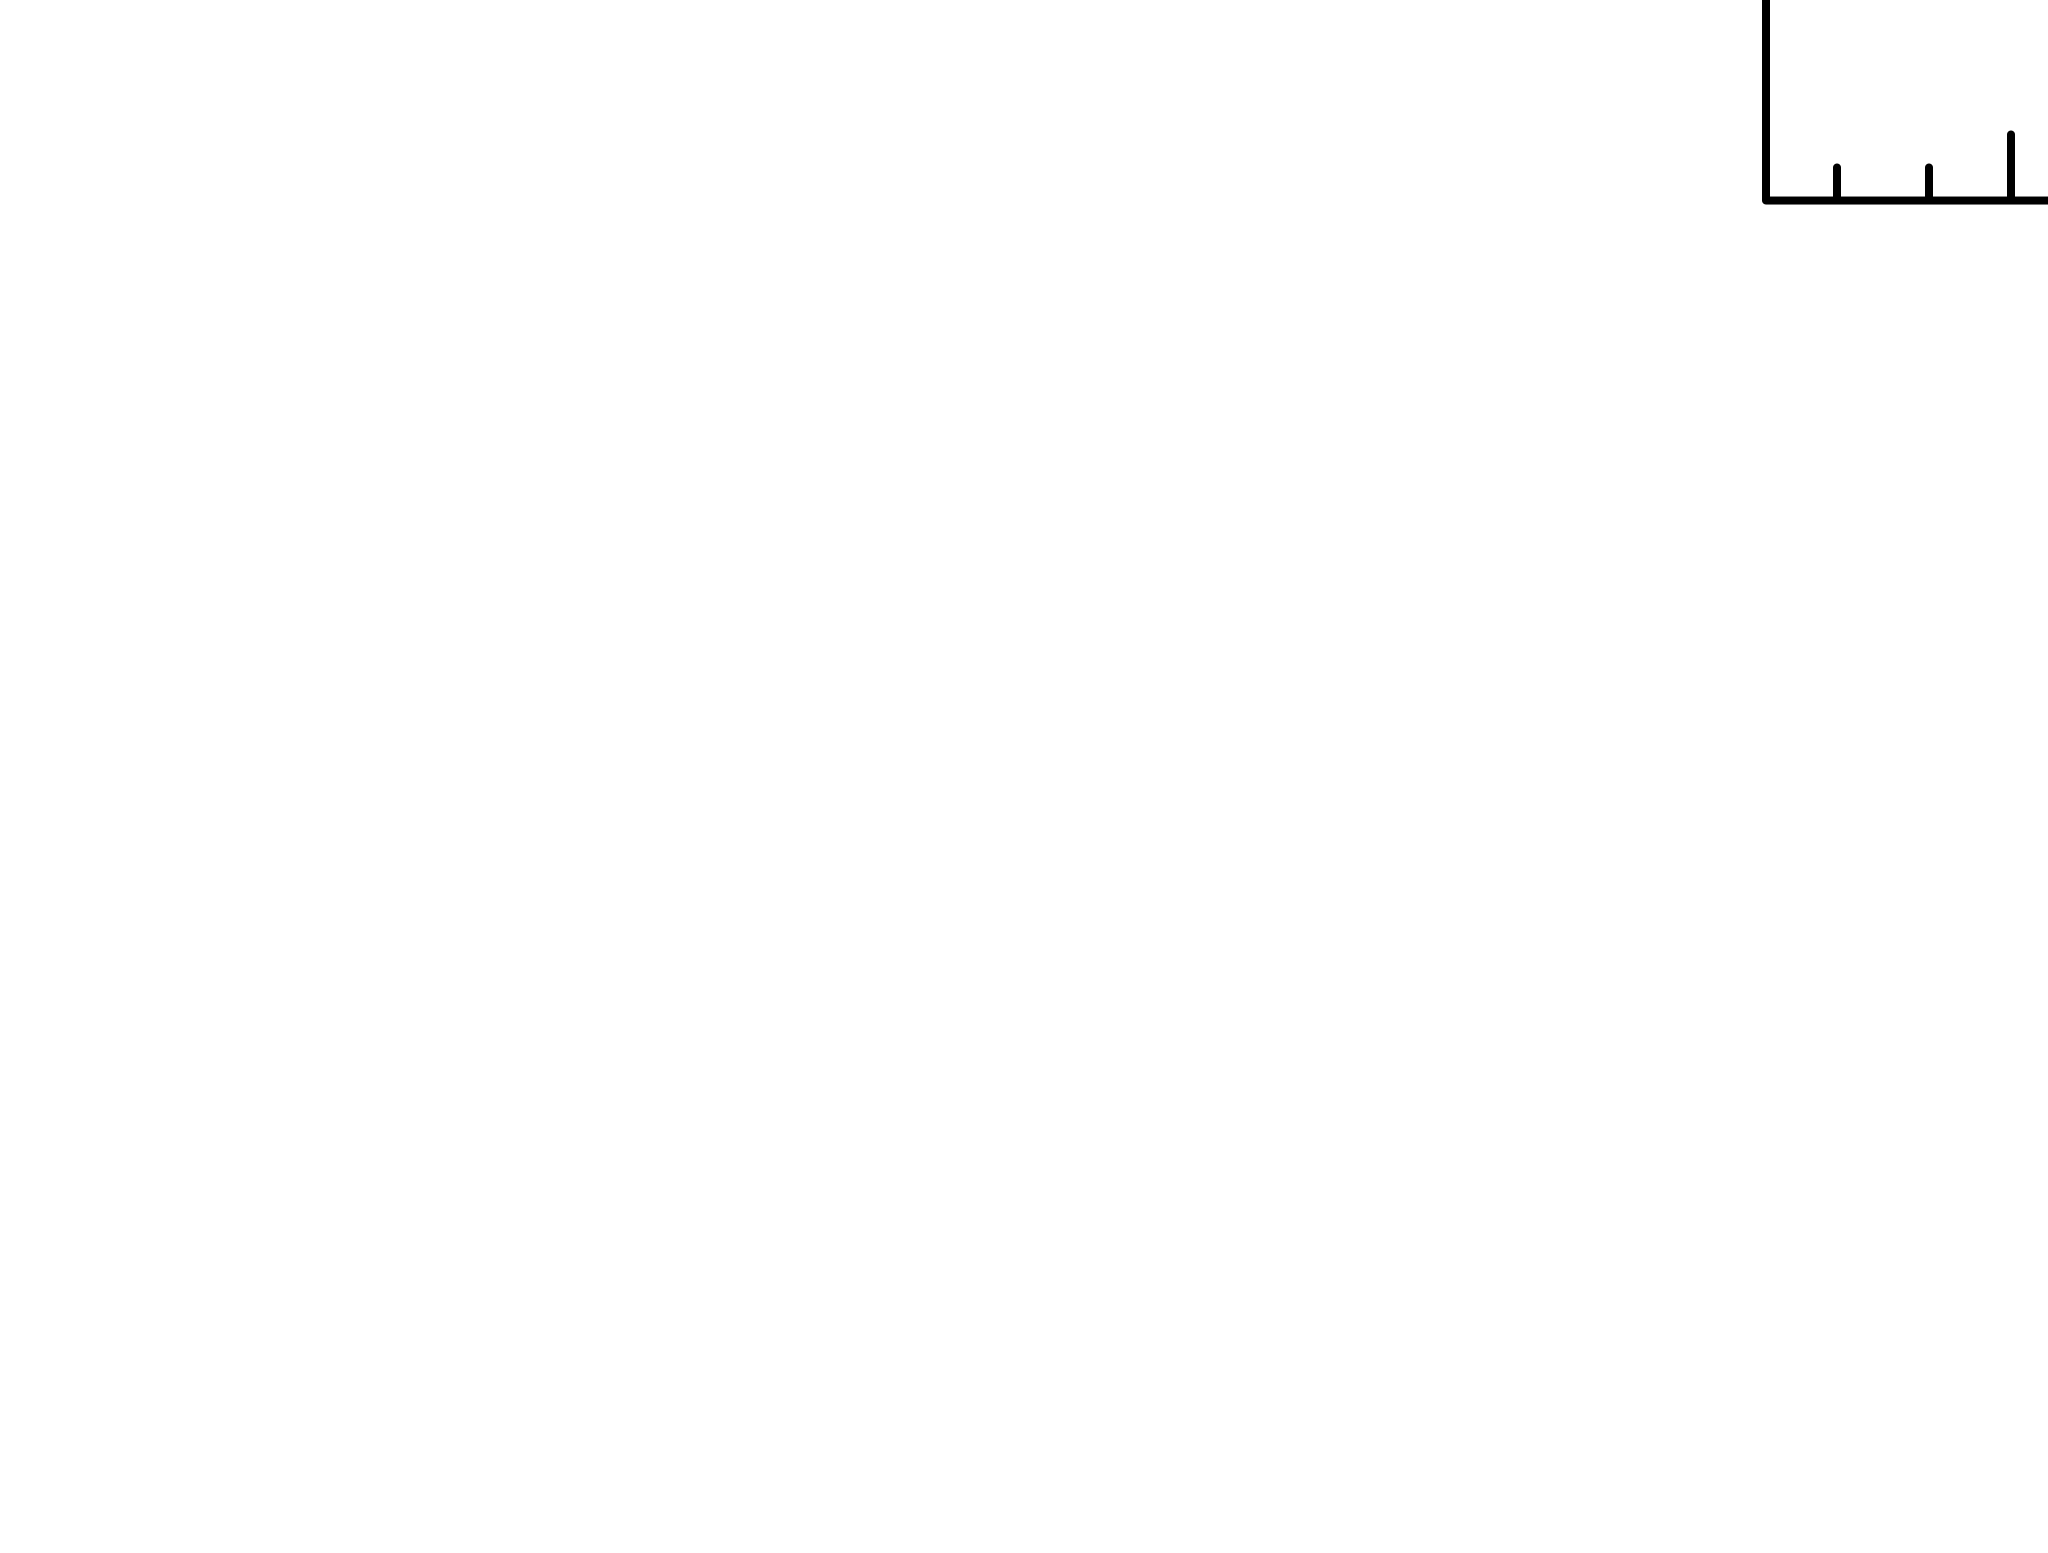


User entered plot commands:
 Plot settings:
   Showing of individual additive components is ON.
   Showing of background spectra is OFF.
   Effective area normalization is OFF.
   Current unit settings:
      Energy     = keV
      Wavelength = angstrom, with Y-Axis displayed per Hz
   X-Axis data display mode: Energy
   Spectra plots will be shifted to source frame by redshift value z: 0
   Device: /svg
   Plotting of line IDs is OFF.
   Splashpage is ON.
   xlog for data plots is ON.
   ylog for data plots is OFF.

   Default plot rebin settings for all plot groups:
   Min. Signif.   Max. # Bins   Error Type
        0.00000             1         quad
No plot commands have been entered.


In [61]:
xspec.AllData.ignore("1.0-2.0")
xspec.Plot.device = "/svg"
xspec.Plot.xAxis = "keV"
xspec.Plot("data")
xspec.Plot.add = True
#xspec.Plot.background = True
xspec.Plot.show()

In [ ]:
xspec.Plot.commands
print(xspec.AllData.nSpectra)

()

In [60]:
plotdata = wx.plot.get_SpectrumData()

fig, ax = plt.subplots(2,2)

ax[0,0] = plotdata.plot_err(ax[0,0], c='k', ms='1', lw=1, alpha=0.5, label='plot_err')
ax[1,0] = plotdata.plot_fill(ax[1,0], color='pink', alpha=0.5, label='plot_fill')
ax[0,1] = plotdata.plot_fill_err(ax[0,1], color='0.75', alpha=0.5, label='plot_fill_err')
ax[1,1] = plotdata.plot_step(ax[1,1], label='plot_step')

for item in ax.flatten():
    item.set_xscale('log')
    item.set_xlabel('Energy (keV)')
    item.set_xlim(0.1,12)
    item.legend(loc=0)
plt.tight_layout()


***XSPEC Error: Requested array does not exist for this plot.


Exception: Error: Unable to retrieve requested plot array

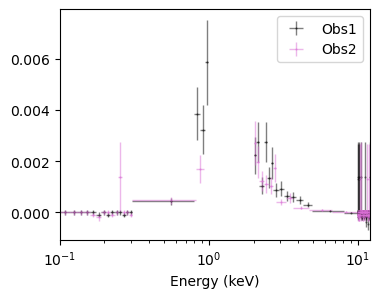

In [56]:
plotdata2 = wx.plot.get_SpectrumData(s=2)

fig, ax = plt.subplots(1,1, figsize=(4,3))

ax = plotdata.plot_err(ax, c='k', ms='1', lw=1, alpha=0.5, label='Obs1')
ax = plotdata2.plot_err(ax, c='orchid', ms='1', lw=1, alpha=0.5, label='Obs2')

ax.set_xscale('log')
ax.set_xlabel('Energy (keV)')
ax.set_xlim(0.1,12)
ax.legend(loc=0)

In [57]:
plotmodel = wx.plot.get_ModelData()
plotmodel2 = wx.plot.get_ModelData(s=2)

fig, ax = plt.subplots(1,2, figsize=(8,3))

ax[0] = plotdata.plot_err(ax[0], c='k', lw=1, label='Data')
ax[0] = plotmodel.plot_step(ax[0], c='orchid', label='Model')
ax[0].set_title('Obs1')

ax[1] = plotdata2.plot_err(ax[1], c='k', lw=1, label='Data')
ax[1] = plotmodel2.plot_step(ax[1], c='orchid', label='Model')
ax[1].set_title('Obs2')

for item in ax:
    item.set_xscale('log')
    item.set_xlabel('Energy (keV)')
    item.set_xlim(0.1,12)
    item.legend(loc=0)


***XSPEC Error: Requested array does not exist for this plot.


Exception: Error: Unable to retrieve requested plot array

In [ ]:
xspec.Plot.addComp(1,1,1)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.2553757009202852e-06,
 4.679597024636064e-06,
 4.120252754586708e-06,
 3.3346930846083356e-06,
 2.9365406404961413e-06,
 2.86352931585378e-06,
 2.9653308451485422e-06,
 3.0516155821814087e-06,
 3.0886665028554503e-06,
 3.072396601360532e-06,
 3.045637441125542e-06,
 3.1423594753187358e-06,
 3.3538840310240036e-06,
 3.585983792331053e-06,
 0.0004280461698825625,
 0.000998441627118131,
 0.0009973118200478574,
 0.0006506708738486095,
 2.3752525288243626e-06,
 1.2767598744860334e-06,
 6.148049583270219e-07,
 3.106005539753972e-07,
 1.5774649465172545e-07,
 7.438611075444546e-08,
 3.351580741428776e-08,
 9.984677692218422e-09,
 2.545338219544944e-09,
 4.5628299270458213e-10,
 6.847371255927462e-11,
 5.05962707273172e-12,
 2.933094397678335e-14,
 6.118901729447541e-22,
 1.0272142475275899e-25,
 9.304901085483069e-26,
 8.435312655282642e-26,
 7.65045885309961e-26,
 6.931765224024114e-26,
 6.262413725768852e-26,
 5.667383700095207e-26,
 5.1264525348

## Testing accessing the Spectrum Object directly, instead of the PlotManager

***Warning: Fit is not current.


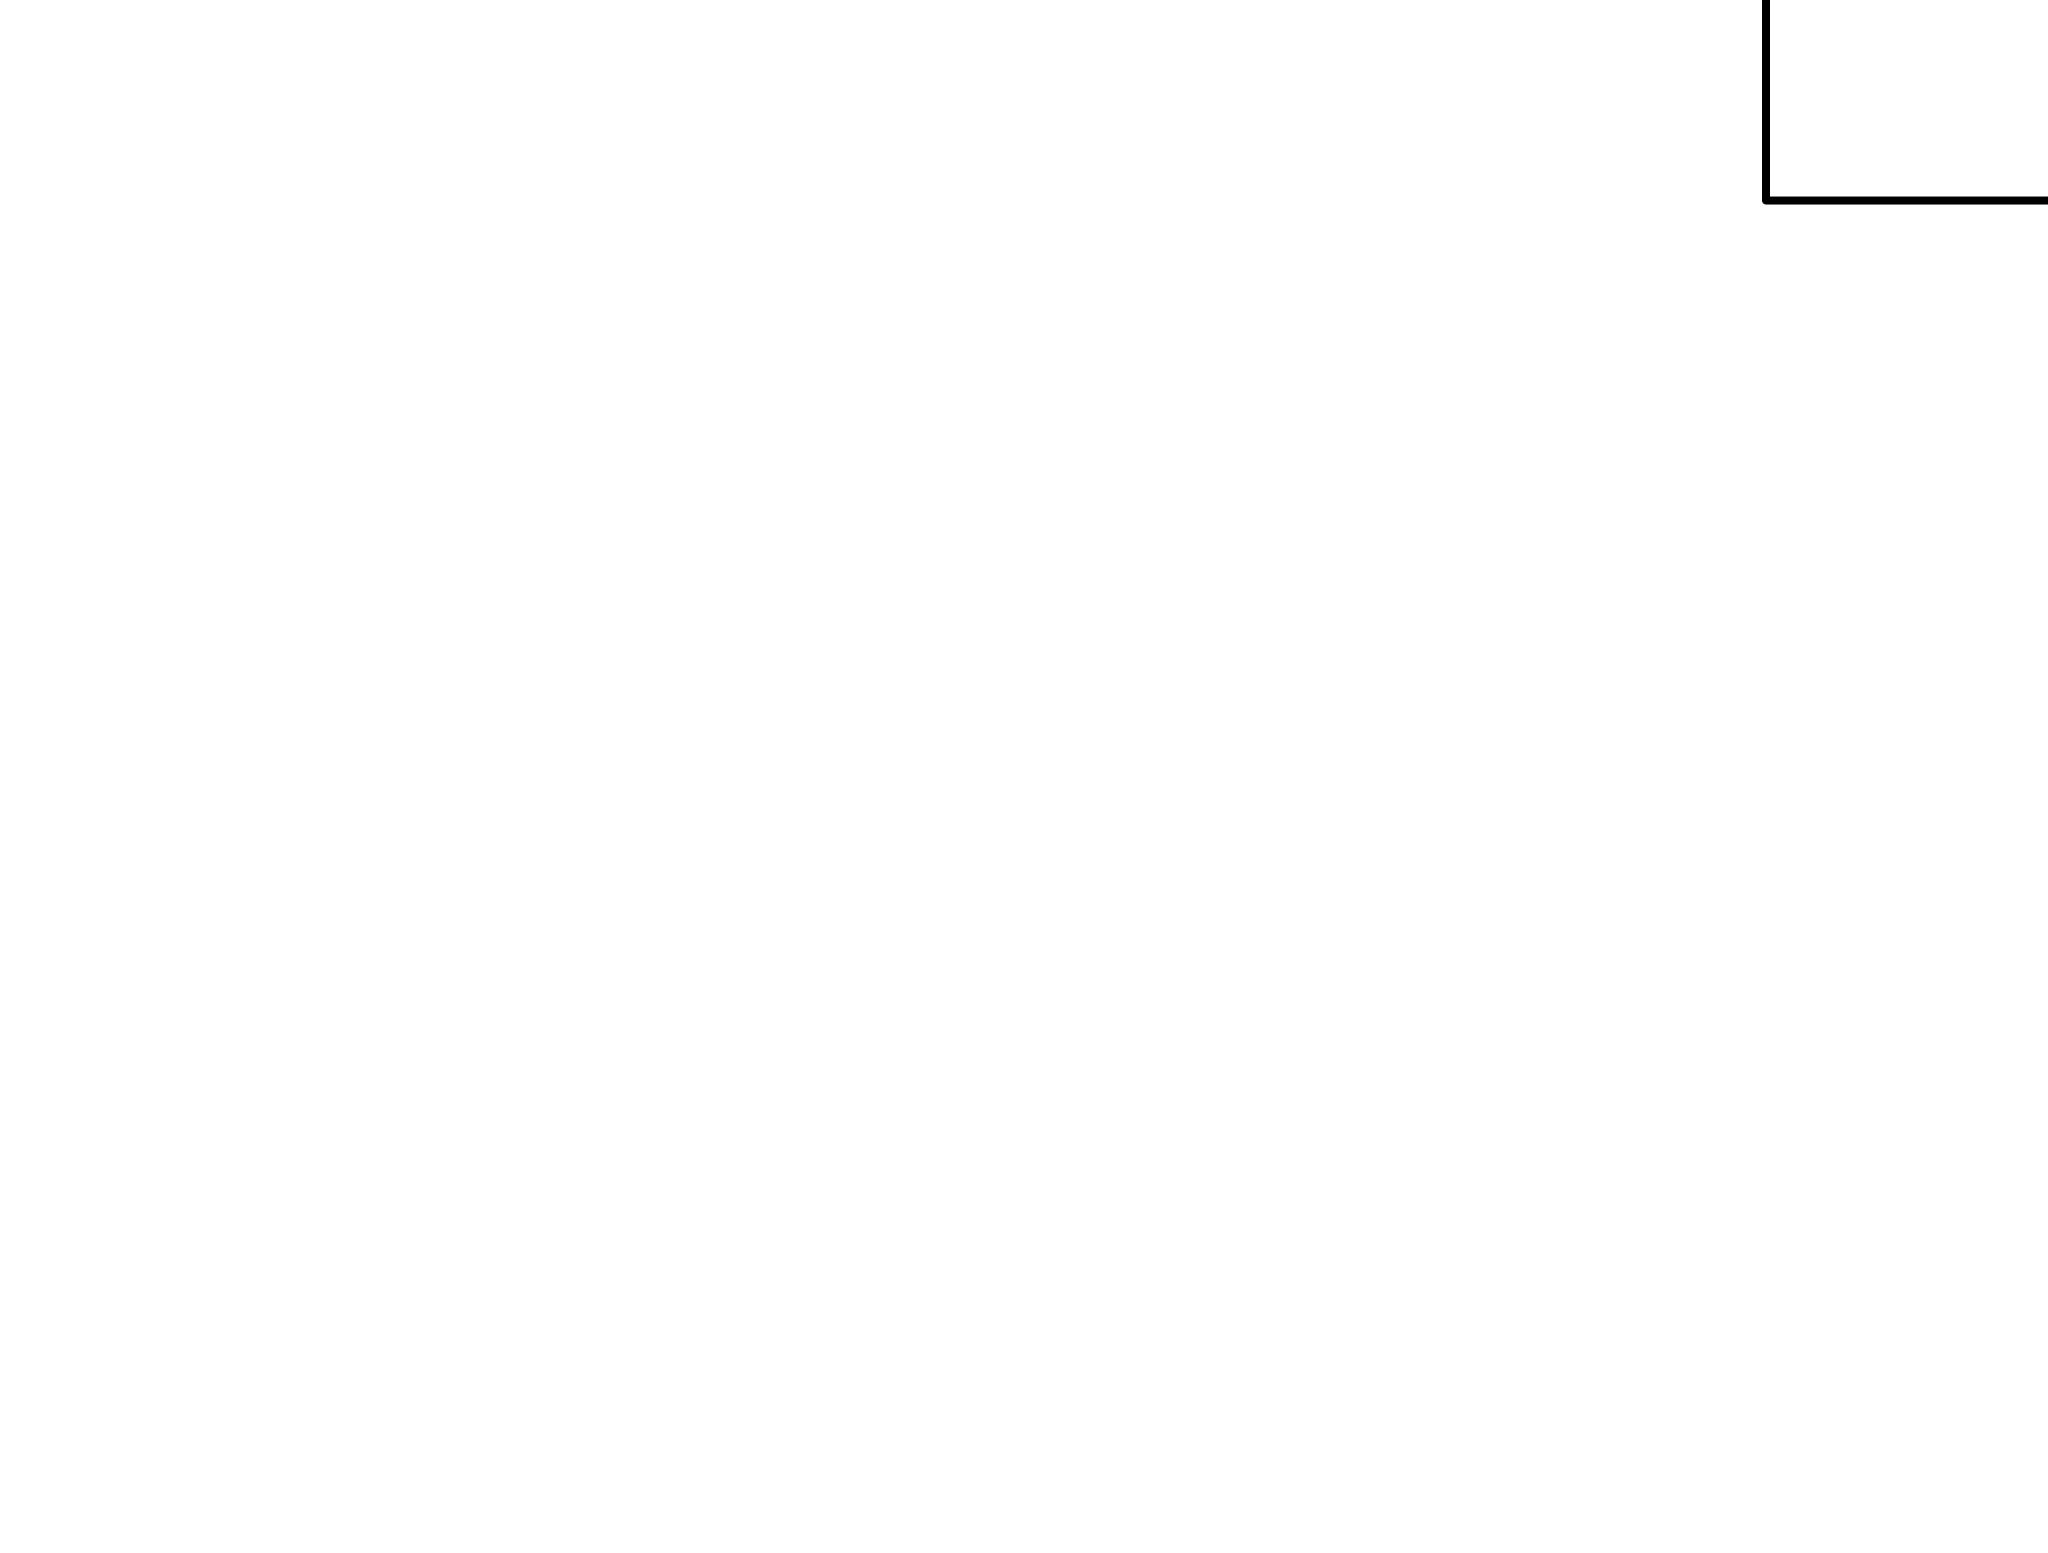

In [ ]:
xspec.Plot.device = "/svg"
xspec.Plot.xAxis = "channel"
#xspec.Plot.show()
xspec.Plot("data")
#plt.plot(xspec.Plot.x(1), xspec.Plot.y(1))

(0.0, 100.0)

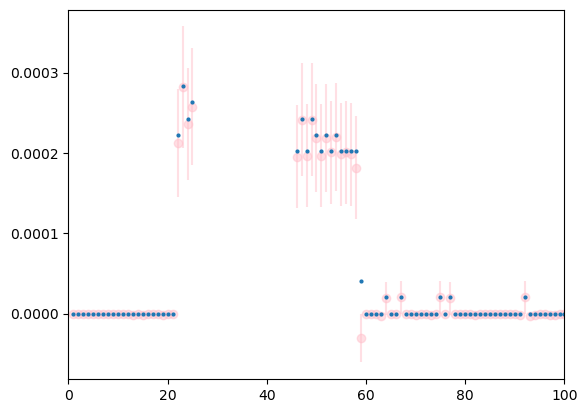

In [ ]:
fig, ax = plt.subplots(1,1)

ax.errorbar(xspec.Plot.x(1), xspec.Plot.y(1), yerr=xspec.Plot.yErr(1), 
            fmt='o', c='pink', alpha=0.5)

ax.errorbar(spec1.noticed, spec1.values, yerr=spec1.variance,
            fmt='o', ms=2)

ax.set_xlim(0,100)

In [ ]:
print(spec1.variance)

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.496170312184572e-09, 5.722398579144001e-09, 4.904913067837715e-09, 5.313655823490858e-09, 4.087427556531429e-09, 4.904913067837715e-09, 4.087427556531429e-09, 4.904913067837715e-09, 4.496170312184572e-09, 4.087427556531429e-09, 4.496170312184572e-09, 4.087427556531429e-09, 4.496170312184572e-09, 4.087427556531429e-09, 4.087427556531429e-09, 4.087427556531429e-09, 4.087427556531429e-09, 8.174855113062859e-10, 0.0, 0.0, 0.0, 0.0, 4.0874275565314295e-10, 0.0, 0.0, 4.0874275565314295e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0874275565314295e-10, 0.0, 4.0874275565314295e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0874275565314295e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
xspec.Plot("?")

plot data/models/fits etc
    Syntax: plot commands:
	background     chain          chisq          contour        counts         
	data           delchi         dem            edata          eedata         
	eemodel        eeufspec       efficiency     emodel         eqw            
	eufspec        fitstat        foldmodel      goodness       icounts        
	insensitivity  integprob      lcounts        ldata          ledata         
	leedata        margin         model          polangle       polfrac        
	ratio          residuals      sensitivity    sum            ufspec         
	
    Multi-panel plots are created by entering multiple options e.g. data fitstat

